## Count the number of neighboring cells in the 3x3 window that have a different value from the center cell

In [21]:
from math import isnan    
from arcpy.sa import Raster, RasterCellIterator    
from arcpy.ia import Render

In [22]:
landu = Raster(r"C:\sample_data\landuse")    
# Create a temporary output raster based on the raster info of landuse    
output = Raster(landu.getRasterInfo())    

In [23]:
with RasterCellIterator({'rasters':[landu, output]}) as rci:    
    for i,j in rci:    
        count = 0     
        # Assign NoData value to the output if the input is NoData    
        if isnan(landu[i,j]):    
            output[i,j] = math.nan    
            continue    
        # Create a moving window    
        for x in [-1,0,1]:    
            for y in [-1,0,1]:    
                # Count the number of adjacent cells with a different value      
                if not isnan(landu[i+x,j+y]) and landu[i+x,j+y] != landu[i,j]:    
                    count+=1    
        output[i,j] = count    
output.save(r"C:\output\landuse_diff_count.tif")   

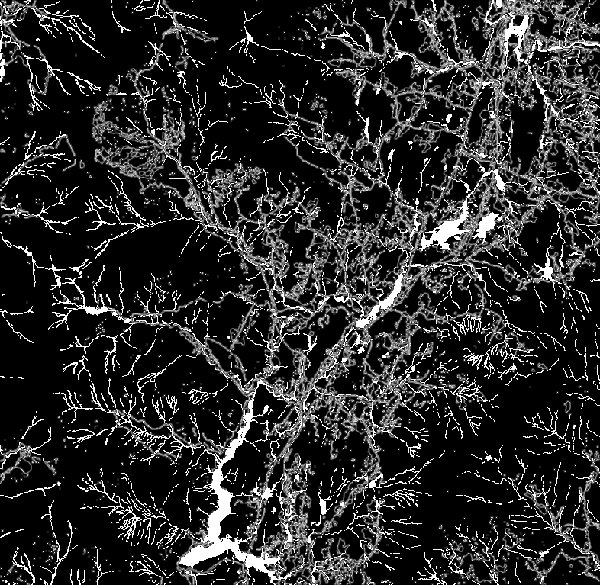

In [24]:
Render(output, colormap="Black to White")

Number of neighboring cells that have a different value from the center cell is represented by black (8) to white color (0).